In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Preprocesamiento

In [2]:
imagePath = "C:/Users/felip/OneDrive/POLIMI FORE/SEMESTRE II/ADVANCED_MEASSUREMENTS/PROGETTO/images/Images1/"

imageURL = imagePath + "border3.jpg"

img = cv.imread(imageURL,0)

print(f"Tipo de dato (dtype): {img.dtype}")
print(f"Valor mínimo: {np.min(img)}")
print(f"Valor máximo: {np.max(img)}")

Tipo de dato (dtype): uint8
Valor mínimo: 0
Valor máximo: 255


In [3]:
# THRESHOLD
thValue = 150
_ , thBIN = cv.threshold(img,thValue,255,cv.THRESH_BINARY)
_ , thBININV = cv.threshold(img,thValue,255,cv.THRESH_BINARY_INV)
_ , thTOZERO = cv.threshold(img,thValue,255,cv.THRESH_TOZERO)
_ , thTOZEROINV = cv.threshold(img,thValue,255,cv.THRESH_TOZERO_INV)
_ , thTRUNC = cv.threshold(img,thValue,255,cv.THRESH_TRUNC)

(np.float64(-0.5), np.float64(3023.5), np.float64(3642.5), np.float64(-0.5))

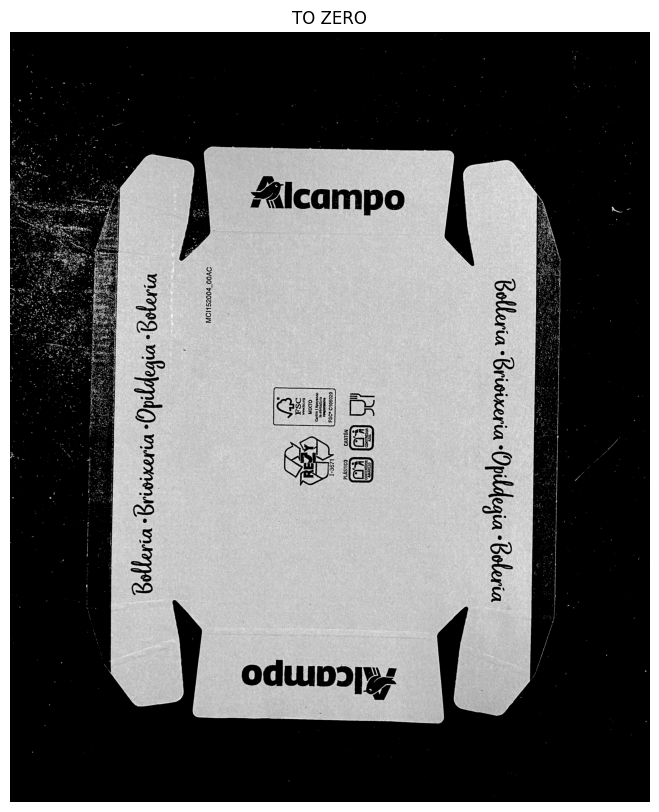

In [4]:
plt.figure(figsize=(15, 10))
plt.imshow(thTOZERO, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO")
plt.axis("off")

(np.float64(-0.5), np.float64(3023.5), np.float64(3642.5), np.float64(-0.5))

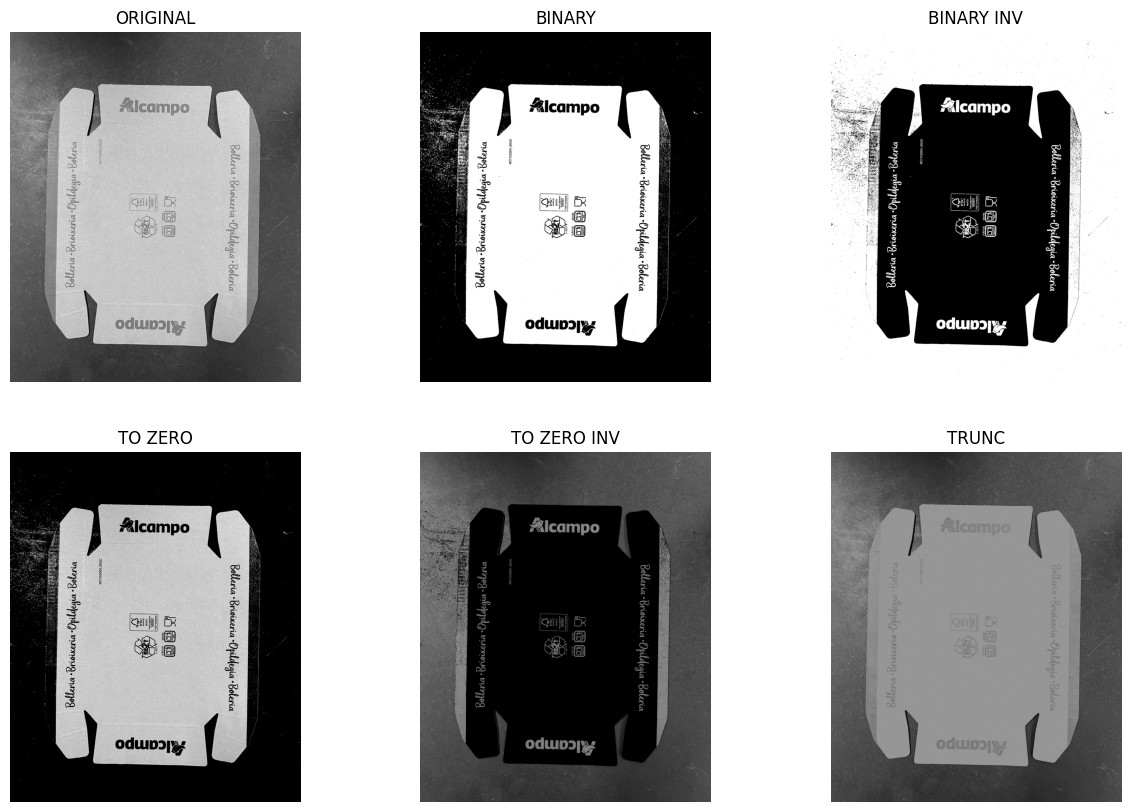

In [87]:
# PLOT IMAGES

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("ORIGINAL")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(thBIN, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(thBININV, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("BINARY INV")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(thTOZERO, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(thTOZEROINV, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TO ZERO INV")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(thTRUNC, cmap="gray", vmin=0, vmax=255) # to complete
plt.title("TRUNC")
plt.axis("off")

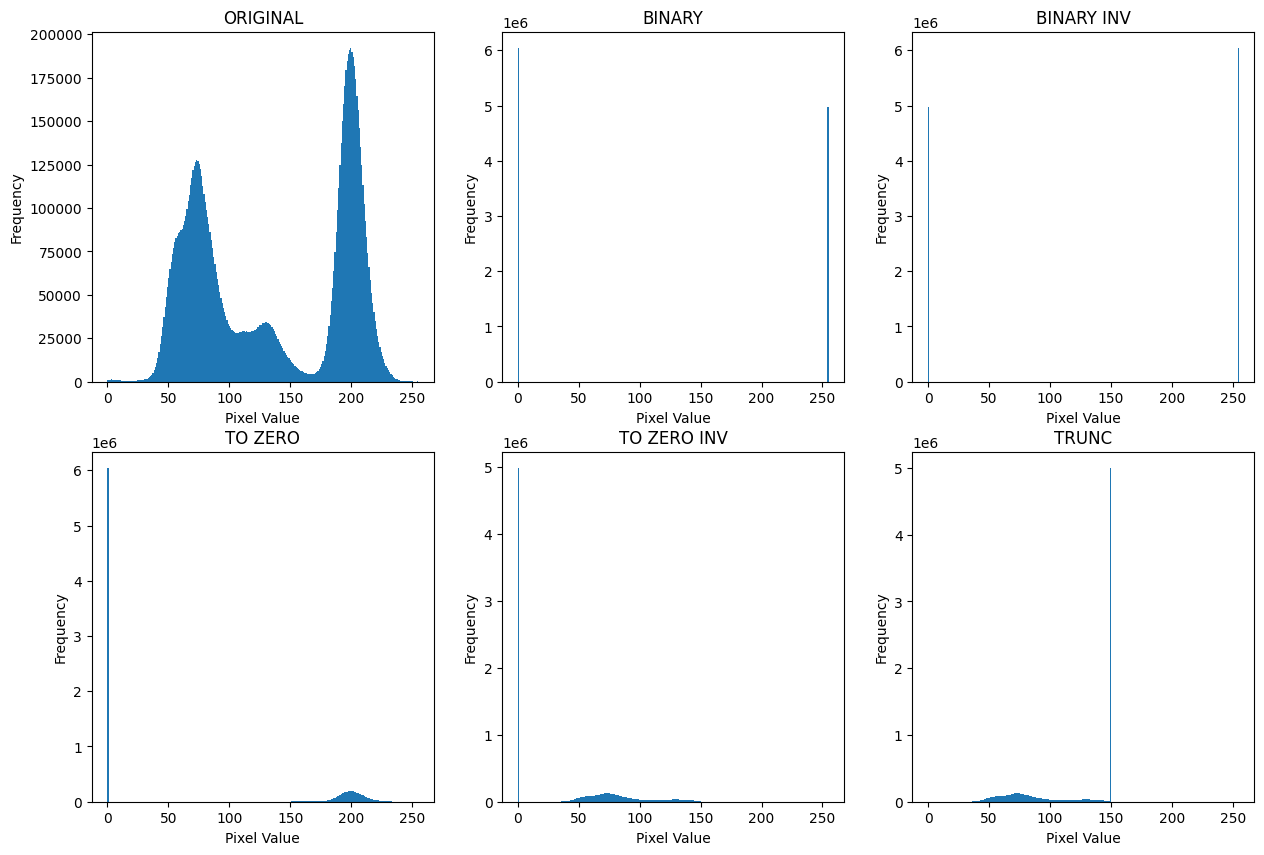

In [5]:
# PLOT HISTOGRAMS

plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

plt.subplot(2,3,1)
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.title("ORIGINAL")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,2)
plt.hist(thBIN.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("BINARY")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,3)
plt.hist(thBININV.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("BINARY INV")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,4)
plt.hist(thTOZERO.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TO ZERO")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,5)
plt.hist(thTOZEROINV.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TO ZERO INV")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.subplot(2,3,6)
plt.hist(thTRUNC.ravel(), bins=256, range=(0, 255)) # to complete
plt.title("TRUNC")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()

Tipo de dato (dtype): uint8
Valor mínimo: 0
Valor máximo: 255


<Figure size 1500x1000 with 0 Axes>

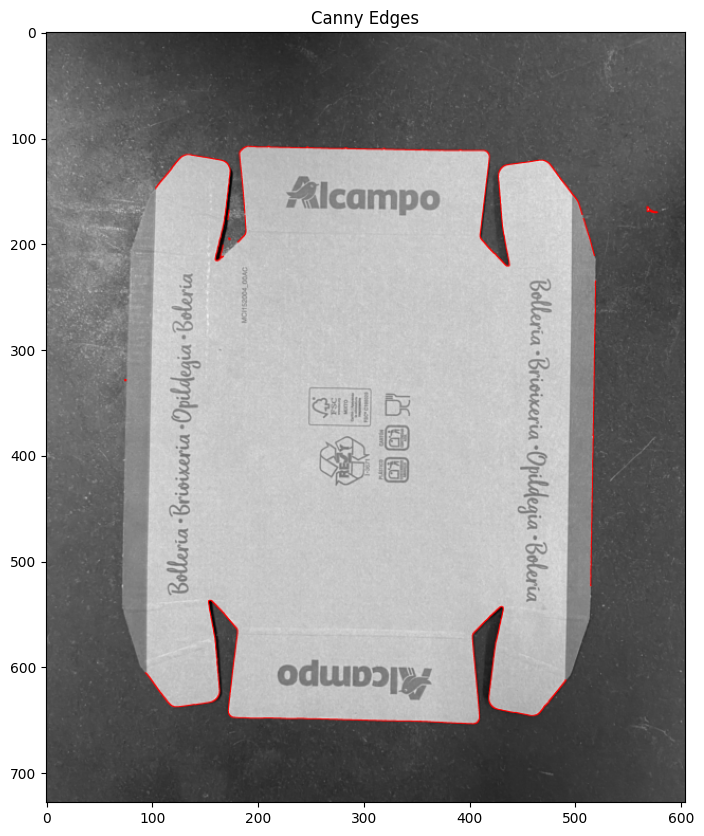

In [12]:
#img = thTOZERO

img2 = cv.GaussianBlur(thTOZERO, (15 , 15), 1) # to complete


img_input = thTOZERO  # O la imagen que estés usando en Canny


img2 = cv.GaussianBlur(img, (15,15), 2)




# -----------------------------
# Verificar tipo de dato y rango de valores
# -----------------------------
print(f"Tipo de dato (dtype): {img_input.dtype}")
print(f"Valor mínimo: {np.min(img_input)}")
print(f"Valor máximo: {np.max(img_input)}")

# -----------------------------
# 1. Detección de bordes: CANNY
# -----------------------------
canny_edges = cv.Canny(img2, 130, 200, L2gradient=True) # to complete
#canny_edges = cv.Canny(img2, 300, 500, L2gradient=True) # to complete

kernel = np.ones((5,5),np.uint8)
canny_edges = cv.dilate(canny_edges,kernel,iterations=1)

# Copia de imagen
img_coppy = img2.copy()

mask = canny_edges > 0

img_coppy = cv.cvtColor(img_coppy, cv.COLOR_GRAY2BGR)
img_coppy[mask] = [0,0,255]

# Redimensionar a 50% del tamaño original
scale_percent = 20  # Puedes ajustar a 30, 60, etc.
width = int(img_coppy.shape[1] * scale_percent / 100)
height = int(img_coppy.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv.resize(img_coppy, dim, interpolation=cv.INTER_AREA)

plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

plt.figure(figsize=(15, 10))
plt.title("Canny Edges")
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))


In [13]:
# 1. Encontrar las coordenadas de los píxeles blancos (bordes detectados)
coords = cv.findNonZero(canny_edges)  # Retorna una lista de puntos [[x, y]]

if coords is not None:
    # 2. Obtener el rectángulo delimitador más grande
    x, y, w, h = cv.boundingRect(coords)

    # 3. Dibujar el rectángulo sobre la imagen original en color
    img_color_copy = img2.copy()
    cv.rectangle(img_color_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Verde

    # Redimensionar para visualizar mejor
    img_resized = cv.resize(img_color_copy, (800, int(800 * img2.shape[0] / img2.shape[1])))

    # Mostrar resultado
    cv.imshow("Cuadro sobre bordes", img_resized)
    cv.waitKey(0)
    cv.destroyAllWindows()
else:
    print("No se encontraron bordes para encuadrar.")

In [91]:
img2 = cv.bilateralFilter(thTOZERO, d=9, sigmaColor=75, sigmaSpace=75)

# -----------------------------
# Cálculo de Sobel
# -----------------------------
sobelx = cv.Sobel(img2, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img2, cv.CV_64F, 0, 1, ksize=5)
sobel_combined = cv.magnitude(sobelx, sobely)

sobelx_abs = np.uint8(np.absolute(sobelx))
sobely_abs = np.uint8(np.absolute(sobely))
sobel_combined_abs = np.uint8(np.absolute(sobel_combined))

# -----------------------------
# Aplicar un umbral para eliminar bordes débiles
# -----------------------------
threshold_value = 400  # Ajusta este valor según sea necesario

_, sobelx_thresh = cv.threshold(sobelx_abs, threshold_value, 500, cv.THRESH_BINARY)
_, sobely_thresh = cv.threshold(sobely_abs, threshold_value, 500, cv.THRESH_BINARY)
_, sobel_combined_thresh = cv.threshold(sobel_combined_abs, threshold_value, 500, cv.THRESH_BINARY)

# -----------------------------
# Crear una imagen en color (RGB)
# -----------------------------
img_color = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)  # Convierte la imagen en escala de grises a BGR

# Resaltar los bordes en rojo (en la imagen en color)
img_color[sobel_combined_thresh == 255] = [0, 0, 255]  # Poner píxeles rojos donde se detectaron bordes

# Redimensionar la imagen para verla mejor
new_width = 500  # Ancho deseado
aspect_ratio = img_color.shape[1] / img_color.shape[0]
new_height = int(new_width / aspect_ratio)  # Mantener la relación de aspecto

img_resized = cv.resize(img_color, (new_width, new_height))

# Mostrar la imagen redimensionada
cv.imshow('Bordes en rojo', img_resized)
cv.waitKey(0)
cv.destroyAllWindows()

In [92]:
import cv2
import numpy as np

# Cargar imagen y convertir a escala de grises
img = cv2.imread("C:/Users/felip/OneDrive/POLIMI FORE/SEMESTRE II/ADVANCED_MEASSUREMENTS/PROGETTO/images/Images1/falla1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar desenfoque para reducir ruido
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Umbral adaptativo
thresh = cv2.adaptiveThreshold(blur, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV,
                                111, 4)

# Opcional: encontrar contornos para destacar regiones oscuras (zonas de falla)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en la imagen original
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 0, 255), 2)

# Redimensionar para mostrar más pequeño
scale_percent = 50
dim = (int(img_contours.shape[1] * scale_percent / 100),
       int(img_contours.shape[0] * scale_percent / 100))
resized = cv2.resize(img_contours, dim, interpolation=cv2.INTER_AREA)

# Mostrar resultados
cv2.imshow("Zonas detectadas como fallas", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
